In [603]:
 #Buisness Problem : To Predict Price of Flight 

In [604]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [605]:
df = pd.read_excel("Train.xlsx")
df1 = pd.read_excel("Test.xlsx")


In [606]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [607]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [609]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [610]:
print("The size of data :",df.size,"The shape of data is :",df.shape)

The size of data : 117513 The shape of data is : (10683, 11)



# Data Exploration : 

In [611]:
# Describing data 
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [612]:
# Checking is there any na values 
df.apply(lambda x : sum(x.isnull()))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [613]:
# Check na value 

df1.apply(lambda x : sum(x.isnull()))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [614]:
# Checking unique for train and test data 
print(df.apply(lambda x: len(x.unique())))
print()
df1.apply(lambda x: len(x.unique()))
# As we see 
# From every variable we see there unique value or categorical values

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           6
Additional_Info      10
Price              1870
dtype: int64



Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [615]:
# Checking the frequency of each variables 

#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Price']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())




Frequency of Categories for varible Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Frequency of Categories for varible Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019

In [616]:
#
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


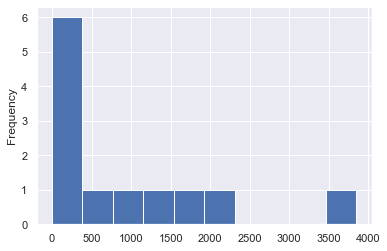

In [617]:
# Univariate analysis
df['Airline'].value_counts().plot.hist()   # 

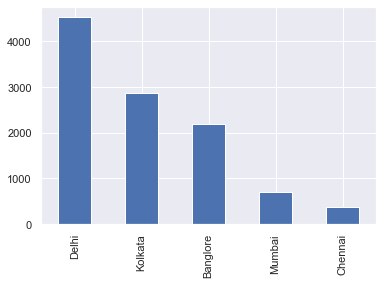

In [618]:
df['Source'].value_counts().plot.bar()

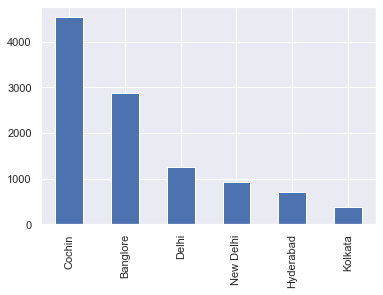

In [619]:
df['Destination'].value_counts().plot.bar()

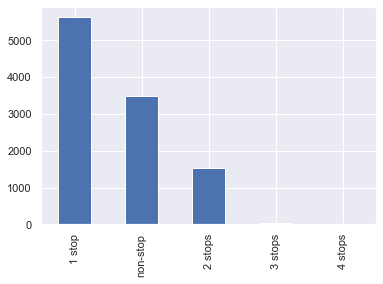

In [620]:
df['Total_Stops'].value_counts().plot.bar()

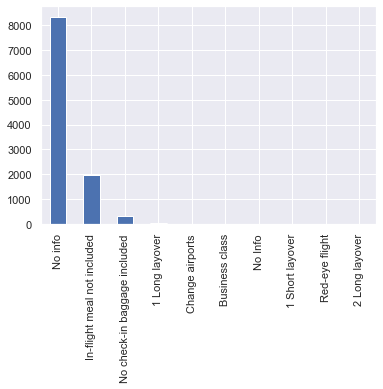

In [621]:
# We just checked the additional info 


df['Additional_Info'].value_counts().plot.bar()

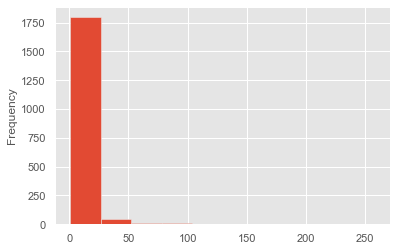

In [622]:
# Check the Price Distribution : 
plt.style.use('ggplot')
df['Price'].value_counts().plot.hist()

In [623]:
df.rank() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3292.0,5415.0,1099.0,10217.5,1297.5,10306.5,352.0,7012.5,8937.0,6510.0,989.0
1,1195.5,889.0,8551.0,1436.0,5571.5,977.5,5065.5,9484.0,6385.5,6510.0,4793.5
2,6243.0,10436.0,4847.0,5140.0,9938.0,3682.0,1267.5,2669.0,6385.5,6510.0,9123.0
3,3292.0,1704.0,8551.0,1436.0,5720.0,8010.0,10454.0,8718.0,2813.0,6510.0,3464.5
4,3292.0,76.5,1099.0,10217.5,2172.0,7160.0,9447.5,8406.5,2813.0,6510.0,8681.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,160.0,9642.0,8551.0,1436.0,3370.5,8973.5,9791.0,5803.5,8937.0,6510.0,1269.0
10679,1195.5,6651.5,8551.0,1436.0,3370.5,9535.5,10365.0,6078.0,8937.0,6510.0,1284.5
10680,6243.0,6651.5,1099.0,8041.0,1297.5,2887.5,3879.0,7907.0,8937.0,6510.0,4414.5
10681,10441.0,76.5,1099.0,10217.5,1297.5,5044.5,5391.0,6321.5,8937.0,6510.0,8178.0


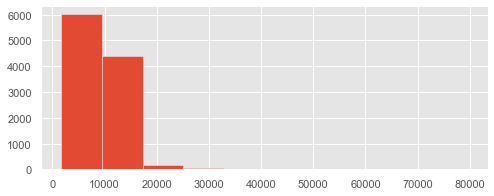

In [624]:
# Check the Distribution of every variable 
plt.figure(figsize=(8,3))
x = df['Price']
plt.hist(x)
plt.show()

In [625]:
# We can do Bivariate analysis but before need to extract some of the variables 
df['Year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day


In [626]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Year', 'Month', 'Day'],
      dtype='object')

In [627]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [628]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [629]:
# Check Again is there any na values 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Year               0
Month              0
Day                0
dtype: int64

In [630]:
df.dropna(inplace=True)

In [631]:
# Check now is there na values 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Year               0
Month              0
Day                0
dtype: int64

In [632]:
df['Arrival_Time'].str.split("  ")

0        [01:10 22 Mar]
1               [13:15]
2        [04:25 10 Jun]
3               [23:30]
4               [21:35]
              ...      
10678           [22:25]
10679           [23:20]
10680           [11:20]
10681           [14:10]
10682           [19:15]
Name: Arrival_Time, Length: 10682, dtype: object

In [633]:
col = []
for i in df['Arrival_Time']:
    col.append(i[0:6])
    
e1 = pd.DataFrame(col)


In [634]:
df['ArrivalTime'] = e1

In [635]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Year', 'Month', 'Day', 'ArrivalTime'],
      dtype='object')

In [636]:
df.drop(columns = ['Arrival_Time'],axis =1 ,inplace = True)

In [637]:
# Drop the columns :

df.drop(columns = ['Route'] ,inplace = True)

In [638]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,ArrivalTime
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,2019,3,24,01:10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,2019,1,5,13:15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,No info,13882,2019,9,6,04:25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,2019,12,5,23:30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,2019,1,3,21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,2h 30m,non-stop,No info,4107,2019,9,4,23:20
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,2h 35m,non-stop,No info,4145,2019,4,27,11:20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,3h,non-stop,No info,7229,2019,4,27,14:10
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,2h 40m,non-stop,No info,12648,2019,1,3,19:15


In [639]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Year               0
Month              0
Day                0
ArrivalTime        1
dtype: int64

In [640]:
df['ArrivalTime'].iloc[10681:10682]=df['ArrivalTime'].iloc[10681:10682].fillna("19:15")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [641]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Year               0
Month              0
Day                0
ArrivalTime        0
dtype: int64

In [642]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [643]:
# We have duration coloumn 
import datetime as dt
df['TotalMinutes']=(pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str) 

In [644]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,ArrivalTime,TotalMinutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,2019,3,24,01:10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,2019,1,5,13:15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,No info,13882,2019,9,6,04:25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,2019,12,5,23:30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,2019,1,3,21:35,285


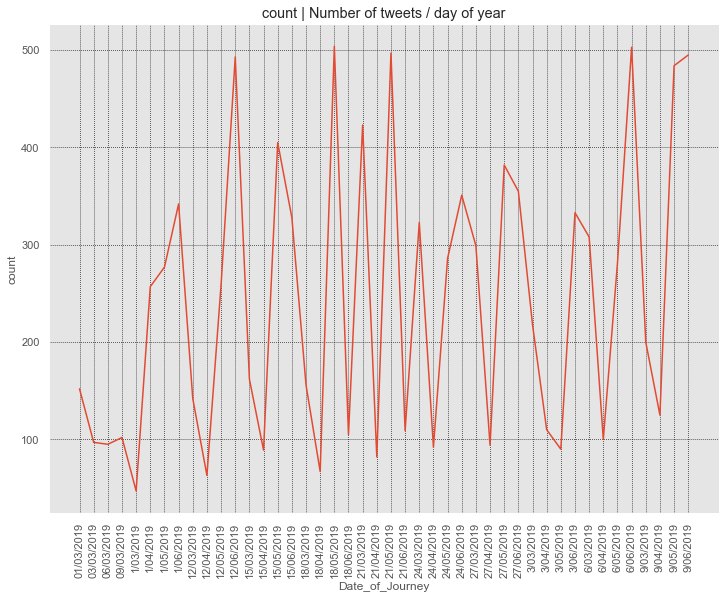

In [645]:

tweets_agg_df = df.groupby(["Date_of_Journey"])["Airline"].count().reset_index()
tweets_agg_df.columns = ["Date_of_Journey", "count"]


def plot_time_variation(df, x='Date_of_Journey', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 
    
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)


# Below It was Showing How Many number of Tweets Day of year
# we are seeing the Increasing Rate of Comment 

In [646]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Year', 'Month',
       'Day', 'ArrivalTime', 'TotalMinutes'],
      dtype='object')

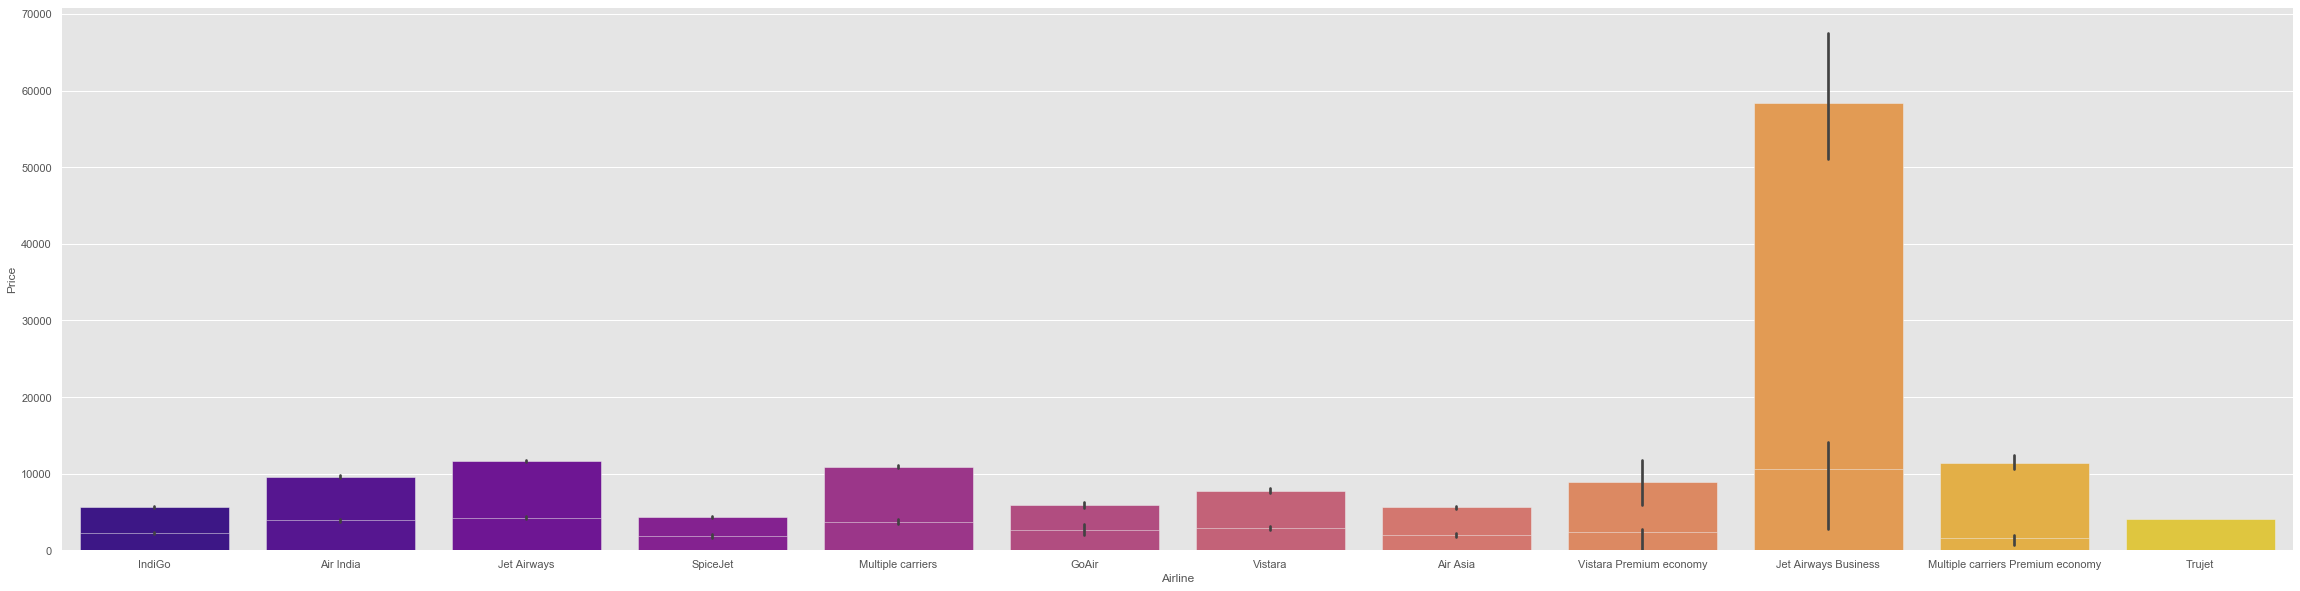

In [647]:
# set the backgroud stle of the plot 
plt.figure(figsize=(40,10))

# plot the graph using the default estimator mean 
sns.barplot(x ='Airline', y ='Price', data = df, palette ='plasma') 

# or 
import numpy as np 

# change the estimator from mean to standard devaition 
sns.barplot(x ='Airline', y ='Price', data = df, 
			palette ='plasma', estimator = np.std) 


In [648]:
df['TotalMinutes']=df['TotalMinutes'].astype(int)

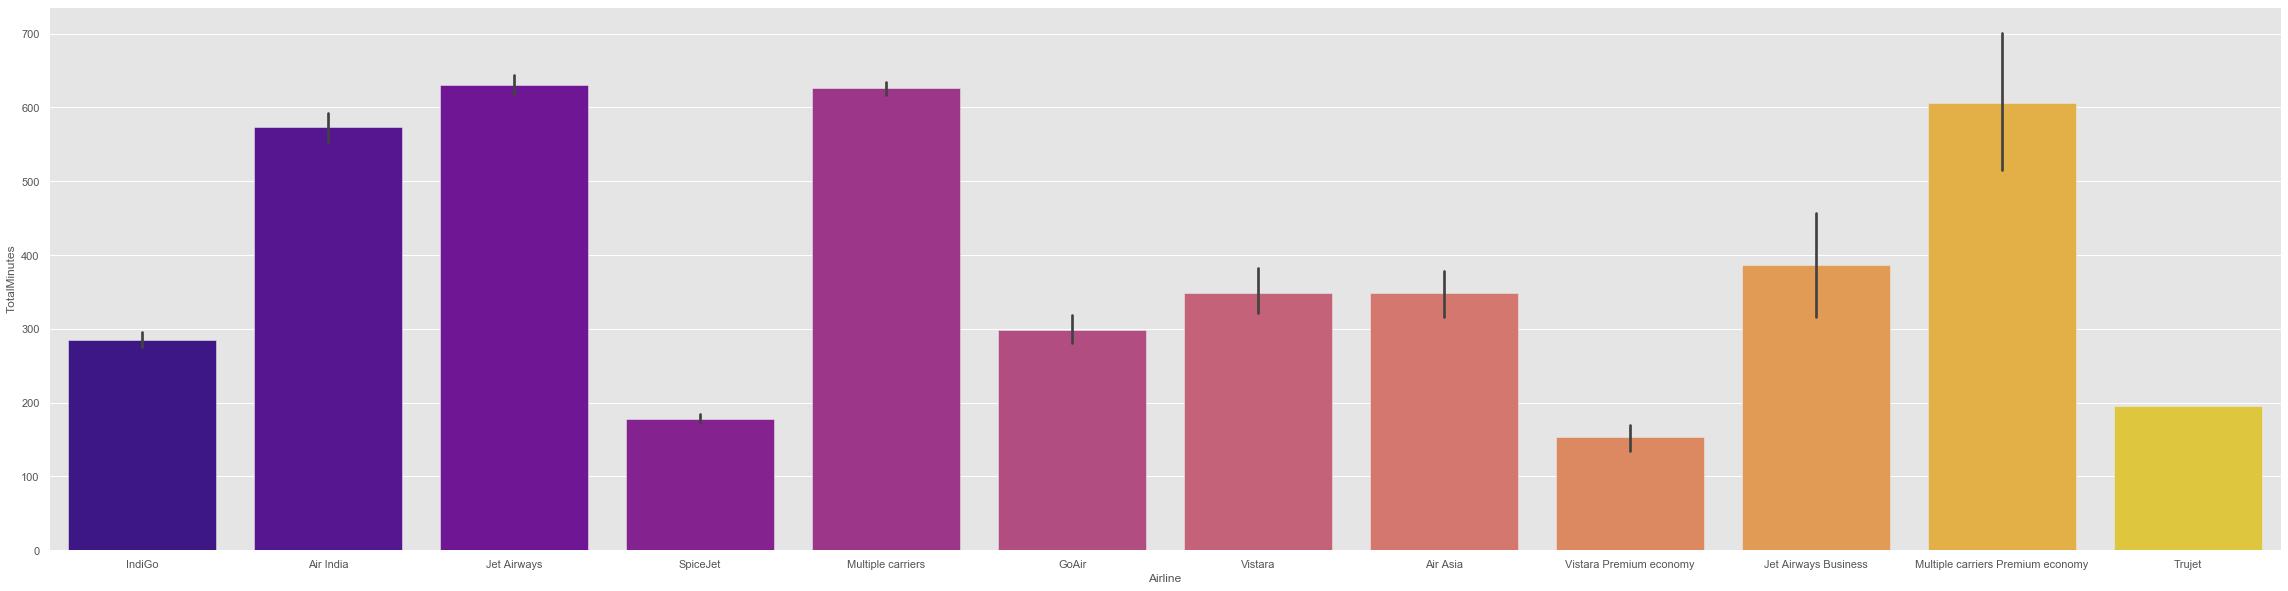

In [649]:
# set the backgroud stle of the plot 
plt.figure(figsize=(40,10))

# plot the graph using the default estimator mean 
sns.barplot(x ='Airline', y ='TotalMinutes', data = df, palette ='plasma') 


In [650]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Year', 'Month',
       'Day', 'ArrivalTime', 'TotalMinutes'],
      dtype='object')

In [651]:
# We Need to Convert one variable into int 
df['TotalMinutes']=df['TotalMinutes'].astype(int)

<Figure size 1440x288 with 0 Axes>

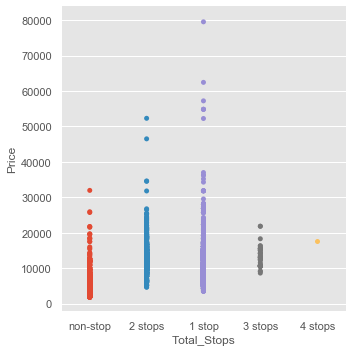

In [652]:
plt.figure(figsize=(20,4))
sns.catplot(x="Total_Stops", y="Price", jitter=False, data=df)

In [653]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [654]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Total_Stops"] = ord_enc.fit_transform(df[["Total_Stops"]])


In [655]:
#
#dict1 = {"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4}

df2=df.copy()

In [656]:
#df2['Total_Stops']=df2['Total_Stops'].map(dict1)

In [657]:
df2['Total_Stops'].value_counts()

0.0    5625
4.0    3491
1.0    1520
2.0      45
3.0       1
Name: Total_Stops, dtype: int64

In [658]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,ArrivalTime,TotalMinutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,4.0,No info,3897,2019,3,24,01:10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,1.0,No info,7662,2019,1,5,13:15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,1.0,No info,13882,2019,9,6,04:25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,0.0,No info,6218,2019,12,5,23:30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,0.0,No info,13302,2019,1,3,21:35,285


<Figure size 1440x288 with 0 Axes>

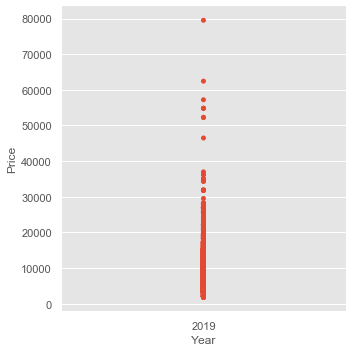

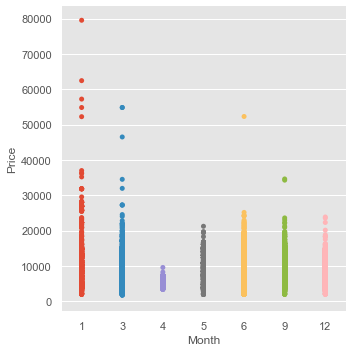

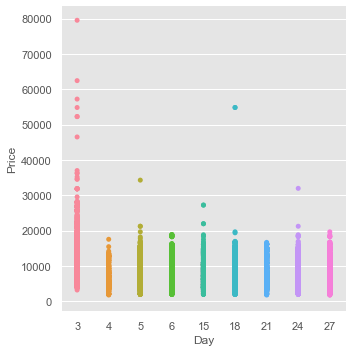

In [659]:
plt.figure(figsize=(20,4))
sns.catplot(x="Year", y="Price", jitter=False, data=df)
sns.catplot(x="Month", y="Price", jitter=False, data=df)
sns.catplot(x="Day", y="Price", jitter=False, data=df)

In [660]:
print(df2['Source'].unique())
df2['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Figure size 936x216 with 0 Axes>

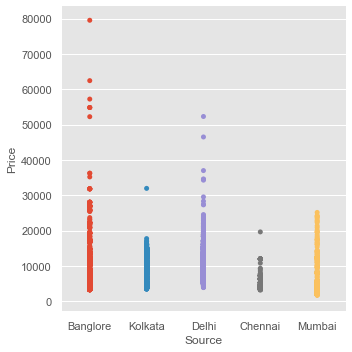

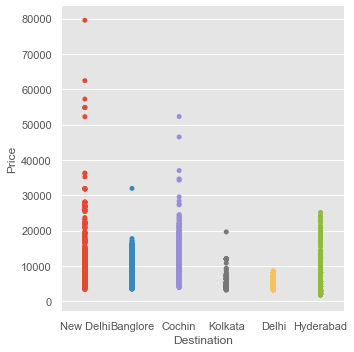

In [661]:
plt.figure(figsize=(13,3))
sns.catplot(x="Source", y="Price", jitter=False, data=df)   # We only see the source flights 
sns.catplot(x="Destination", y="Price", jitter=False, data=df) # Only to check

In [662]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,ArrivalTime,TotalMinutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,4.0,No info,3897,2019,3,24,01:10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,1.0,No info,7662,2019,1,5,13:15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,1.0,No info,13882,2019,9,6,04:25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,0.0,No info,6218,2019,12,5,23:30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,0.0,No info,13302,2019,1,3,21:35,285


In [663]:
# We have a variable called Departure time 

# Extracting Hours
df2["Dep_hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour

# Extracting Minutes
df2["Dep_min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute

# Now we can drop Dep_Time 
df2.drop(["Dep_Time"], axis = 1, inplace = True)

In [664]:
# We have a variable called Arrival Time

# Extracting Hours
df2["Arrival_hour"] = pd.to_datetime(df2.ArrivalTime).dt.hour

# Extracting Minutes
df2["Arrival_min"] = pd.to_datetime(df2.ArrivalTime).dt.minute

# Now we can drop Arrival_Time 
df2.drop(["ArrivalTime"], axis = 1, inplace = True)

In [665]:
#
h = df2['Duration'].str.extract('(\d+)h', expand=False).astype(float) 
m = df2['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df2["Duration_hours"] = h
df2["Duration_mins"] = m

df2.head()
df2['Duration_mins']=df2['Duration_mins'].fillna(0)
df2["Duration_hours"].fillna(0,inplace=True)
df2.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,TotalMinutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,4.0,No info,3897,2019,3,24,170,22,20,1,10,2.0,50.0
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,1.0,No info,7662,2019,1,5,445,5,50,13,15,7.0,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,1.0,No info,13882,2019,9,6,1140,9,25,4,25,19.0,0.0
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,0.0,No info,6218,2019,12,5,325,18,5,23,30,5.0,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,0.0,No info,13302,2019,1,3,285,16,50,21,35,4.0,45.0


In [666]:
df2['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [667]:
# Now Converting Categorial variables into Numrical ( Using Label Encoding -1 hot)
Airline = df2[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Airline = ord_enc.fit_transform(df2[["Airline"]])
Airline=pd.DataFrame(Airline,columns=['Airline'])
Airline

In [668]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [669]:
Source = df2[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Source = ord_enc.fit_transform(df2[["Source"]])
Source=pd.DataFrame(Source,columns=['Source'])
Source

In [670]:
df2['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [671]:
Destination = df2[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Destination = ord_enc.fit_transform(df2[["Destination"]])
Destination=pd.DataFrame(Destination,columns=['Destination'])
Destination

In [672]:
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Year', 'Month', 'Day',
       'TotalMinutes', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [673]:
# Now 
df2.head()

#Removing Unnecassary variable but lets see is it important or not 
df2['Additional_Info'].value_counts(normalize=True)  
# 80percent we no info so we drop it

df2.drop(columns=['Additional_Info'],inplace=True)

df2.tail()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Year,Month,Day,TotalMinutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10678,Air Asia,9/04/2019,Kolkata,Banglore,2h 30m,4.0,4107,2019,9,4,150,19,55,23,20,2.0,30.0
10679,Air India,27/04/2019,Kolkata,Banglore,2h 35m,4.0,4145,2019,4,27,155,20,45,11,20,2.0,35.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,3h,4.0,7229,2019,4,27,180,8,20,14,10,3.0,0.0
10681,Vistara,01/03/2019,Banglore,New Delhi,2h 40m,4.0,12648,2019,1,3,160,11,30,19,15,2.0,40.0
10682,Air India,9/05/2019,Delhi,Cochin,8h 20m,1.0,11753,2019,9,5,500,10,55,19,15,8.0,20.0


In [674]:
data_train = pd.concat([df2, Airline, Source, Destination], axis = 1)

# Drop Unnecassary data from train
# and delete such from the data train
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)
#
data_train.drop(["Duration"], axis = 1, inplace = True)


In [675]:
data_train.isna().sum()
# So we have a No na values 

Total_Stops                                  0
Price                                        0
Year                                         0
Month                                        0
Day                                          0
TotalMinutes                                 0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

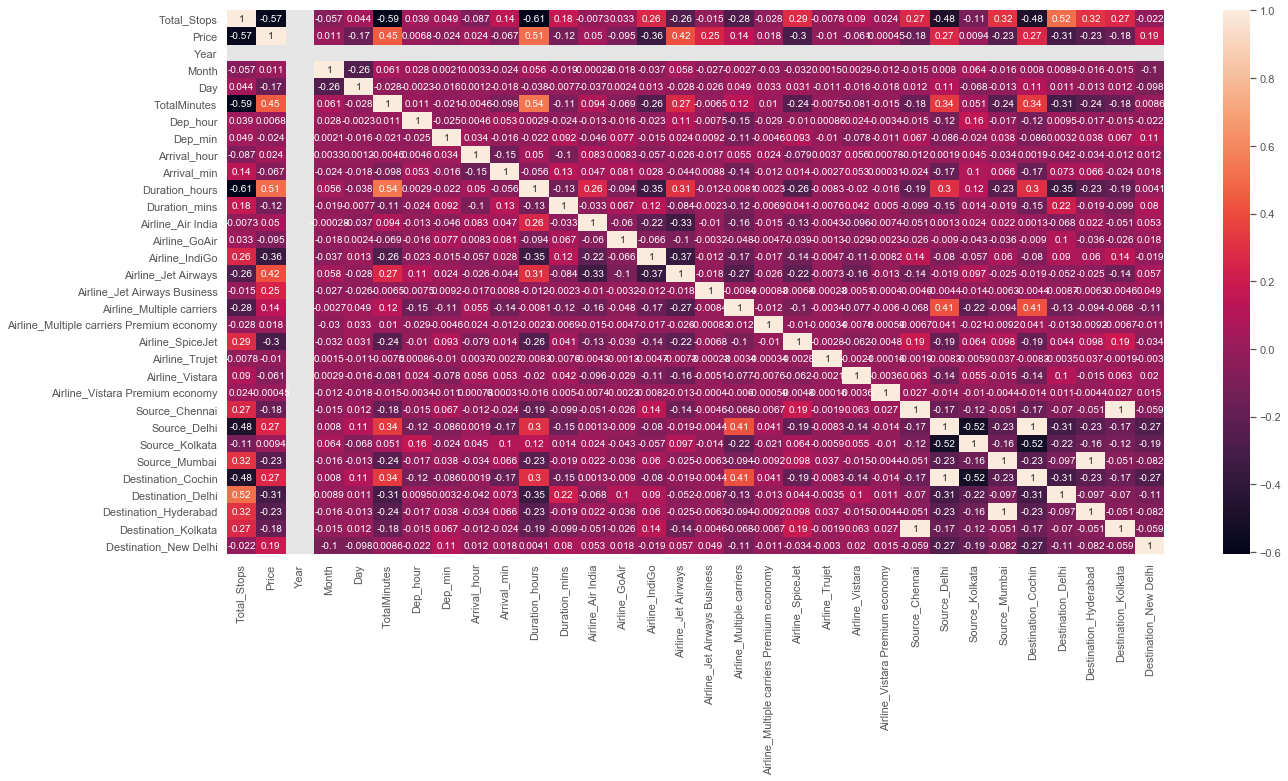

In [676]:
plt.figure(figsize=(21,10))
corrMatrix = data_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()



In [677]:
# Import library for VIF  # analytics 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [678]:
calc_vif(data_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Total_Stops,3.343824
1,Price,2.421806
2,Year,0.000000
3,Month,1.111423
4,Day,1.164362
5,TotalMinutes,1.741282
6,Dep_hour,1.058719
7,Dep_min,1.099882
8,Arrival_hour,1.074615
9,Arrival_min,1.097587


In [679]:
# Let's our test data ready for Model Building
# Drop Some Coloumns
#df1.drop(columns=['Route','Additional_Info'],inplace=True,axis=1)
df1.head()

# Date of Journey extract year month day

df1['Year'] = pd.DatetimeIndex(df1['Date_of_Journey']).year
df1['Month'] = pd.DatetimeIndex(df1['Date_of_Journey']).month
df1['Day'] = pd.DatetimeIndex(df1['Date_of_Journey']).day

#
df4 =df1.copy()
df4['Total_Stops']=df4['Total_Stops'].map(dict1)
df4['Total_Stops'].value_counts()

#
df4['TotalMinutes']=(pd.to_timedelta(df4['Duration']).dt.seconds // 60).astype(str) 

h = df4['Duration'].str.extract('(\d+)h', expand=False).astype(float) 
m = df4['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df4["Duration_hours"] = h
df4["Duration_mins"] = m

df4['Duration_mins']=df4['Duration_mins'].fillna(0)
df4["Duration_hours"].fillna(0,inplace=True)

#Extracting
# We have a variable called Departure time .
# Extracting Hours
df4["Dep_hour"] = pd.to_datetime(df4["Dep_Time"]).dt.hour

# Extracting Minutes
df4["Dep_min"] = pd.to_datetime(df4["Dep_Time"]).dt.minute

# Now we can drop Dep_Time 
df4.drop(["Dep_Time"], axis = 1, inplace = True)

#
df4['Arrival_Time'].str.split("  ")
col = []
for i in df4['Arrival_Time']:
    col.append(i[0:6])
    
e1 = pd.DataFrame(col)

df4['ArrivalTime'] = e1

# We have a variable called Arrival Time

# Extracting Hours
df4["Arrival_hour"] = pd.to_datetime(df4.ArrivalTime).dt.hour

# Extracting Minutes
df4["Arrival_min"] = pd.to_datetime(df4.ArrivalTime).dt.minute

# Now we can drop Arrival_Time 
df4.drop(["ArrivalTime","Arrival_Time"], axis = 1, inplace = True)

df4.isna().sum()


print("Airline")
print("-"*75)
print(df4["Airline"].value_counts())
Airline = pd.get_dummies(df4["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df4["Source"].value_counts())
Source = pd.get_dummies(df4["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df4["Destination"].value_counts())
Destination = pd.get_dummies(df4["Destination"], drop_first = True)

#
data_test = pd.concat([df4, Airline, Source, Destination], axis = 1)
data_test.isna().sum()




Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Airline                              0
Date_of_Journey                      0
Source                               0
Destination                          0
Route                                0
Duration                             0
Total_Stops                          0
Additional_Info                      0
Year                                 0
Month                                0
Day                                  0
TotalMinutes                         0
Duration_hours                       0
Duration_mins                        0
Dep_hour                             0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                 

In [680]:
data_train.columns

Index(['Total_Stops', 'Price', 'Year', 'Month', 'Day', 'TotalMinutes',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [681]:
# Split Data to X and Y 


X = data_train[['Total_Stops','Year', 'Month', 'Day', 'TotalMinutes',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]


In [682]:
data_train.columns
data_train.shape

(10682, 32)

# Now we are applying stats,sklearn regression algorithms and see the assumption
# Also try Gradient descent,batch,stochastic,mini-batch, and also Try regularisation method
# Lasso,ridge,elastic cv which is combination of lasso and ridge

# So let start ...

In [683]:
# According to Gauss Markov Theorem

# The expectation of error residuals is 0 
# The error are uncorrelated
# the error have a equal variance - Homescedasticity of errors

In [684]:

print(X.shape)
y = data_train['Price']
print(y.shape)

import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

(10682, 31)
(10682,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     582.7
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:11:40   Log-Likelihood:            -1.0055e+05
No. Observations:               10682   AIC:                         2.012e+05
Df Residuals:                   10655   BIC:                         2.013e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

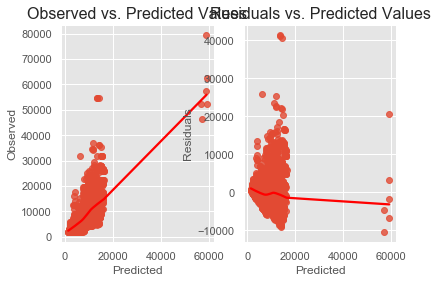

In [685]:
# Linearity 

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)    
    

The residual mean is : 2.016460950243287e-11


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[3.2435636491374455, 0.0, 1.1049805162684976, 1.115832495773492, 1.735994822007345, 1.0583794553367565, 1.0995929742680028, 1.0734421289058091, 1.0966212094276102, 2.2259735033293717, 1.1406201169661006, 6.078795385957075, 1.6095227619722845, 6.313414422338822, 9.261734705206104, 1.0248143100820617, 4.9297387477216095, 1.0505326512249729, 3.442618569207449, 1.0066661682895963, 2.555270654081687, 1.012438254257736, inf, inf, inf, inf, inf, inf, inf, inf, inf]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)



 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   6.956550e+02
p-value                        3.952898e-127
f-value                         2.854746e+01
f p-value                      1.035915e-134

 Goldfeld-Quandt test ----
                value
F statistic  0.989685
p-value      0.647249

 Residuals plots ----


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Variable: Total_Stops --- correlation: -0.0000, p-value: 1.0000
Variable: Year --- correlation: nan, p-value: nan
Variable: Month --- correlation: 0.0000, p-value: 1.0000
Variable: Day --- correlation: -0.0000, p-value: 1.0000
Variable: TotalMinutes --- correlation: 0.0000, p-value: 1.0000
Variable: Dep_hour --- correlation: 0.0000, p-value: 1.0000
Variable: Dep_min --- correlation: 0.0000, p-value: 1.0000
Variable: Arrival_hour --- correlation: 0.0000, p-value: 1.0000
Variable: Arrival_min --- correlation: -0.0000, p-value: 1.0000
Variable: Duration_hours --- correlation: 0.0000, p-value: 1.0000
Variable: Duration_mins --- correlation: -0.0000, p-value: 1.0000
Variable: Airline_Air India --- correlation: -0.0000, p-value: 1.0000
Variable: Airline_GoAir --- correlation: -0.0000, p-value: 1.0000
Variable: Airline_IndiGo --- correlation: -0.0000, p-value: 1.0000
Variable: Airline_Jet Airways --- correlation: 0.0000, p-value: 1.0000
Variable: Airline_Jet Airways Business --- correlation: 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Jarque-Bera test ---- statistic: 117154.5598, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9021, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5405, p-value: 0.0000
Anderson-Darling test ---- statistic: 114.9018, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


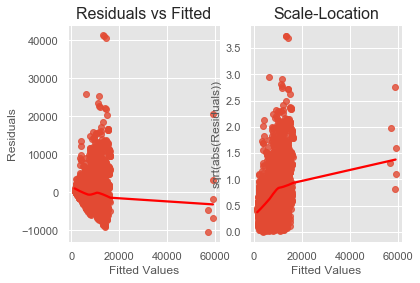

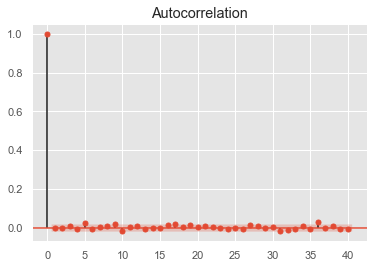

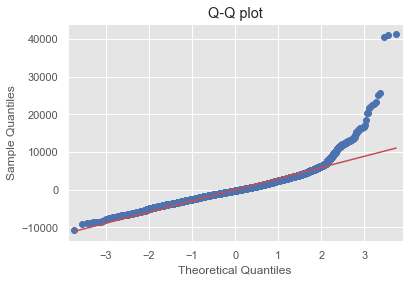

In [686]:
# The inspection show that the linearity assumption is satisfied 
# Now checking the residuals 
print("The residual mean is :",model.resid.mean())
# It is close to zero 


# No perfect multiCollinearity :the feature should be linear independent
# We can detect using vif: 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T
print(vif)
# We see No multi collinearity here .Here is a thumb rule > 10 could be removed
# Our value are less than 10 



#Homoscedasticity ( Equal variance) of residuals:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)
# The result indicates that the assumption is satisified and we should accept 
# Hypothesis of homoscedasticity if they were not we do some transformation




# No autocorrelation of residuals
#Notes
#the test statistic always has a value between 0 and 4
#value of 2 means that there is no autocorrelation in the sample
#values < 2 indicate positive autocorrelation, values > 2 negative one.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()
# The result indicates no auto correlation


# Feature and residual are uncorrelated :Pearson coeffienct
from scipy.stats.stats import pearsonr
for column in X.columns:
    corr_test = pearsonr(X[column], model.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')
# There is no relation between residual and its feature 
# So accept the null hypothesis 


# There is some variablity in feature
X.apply(np.var, axis=0)
# This assumption stated that there is no variance 


# Normality of residuals : 
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model)

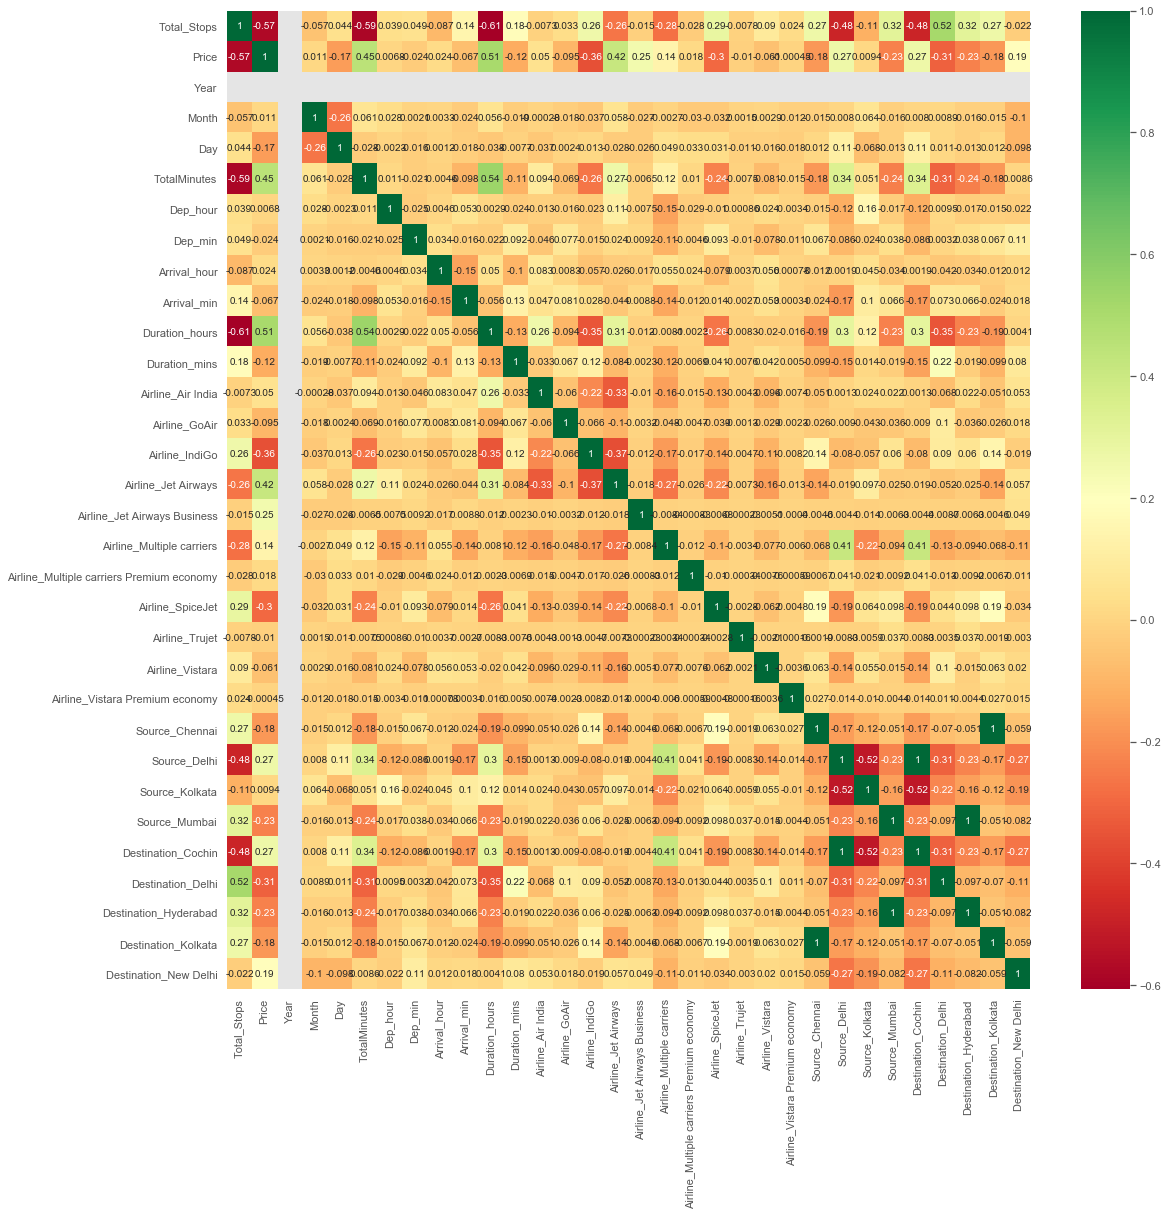

In [687]:
# Dependencies could be check it from Correlation matrix *& vif
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [688]:

# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [689]:
print(selection.feature_importances_)

[3.45516029e-01 0.00000000e+00 8.34534882e-02 1.06785947e-01
 3.27817596e-02 2.66468091e-02 2.20690549e-02 2.66015339e-02
 2.00306117e-02 5.72355076e-02 1.84249267e-02 7.21686588e-03
 1.83641249e-03 2.02795032e-02 9.40116107e-02 6.45193669e-02
 1.78008399e-02 9.40858679e-04 3.07592026e-03 1.34252400e-04
 5.03273335e-03 1.20445624e-04 5.97540478e-04 3.60517062e-03
 4.44688404e-03 4.66898616e-03 2.65193702e-03 2.78452620e-03
 4.20640892e-03 5.22108702e-04 2.20019612e-02]


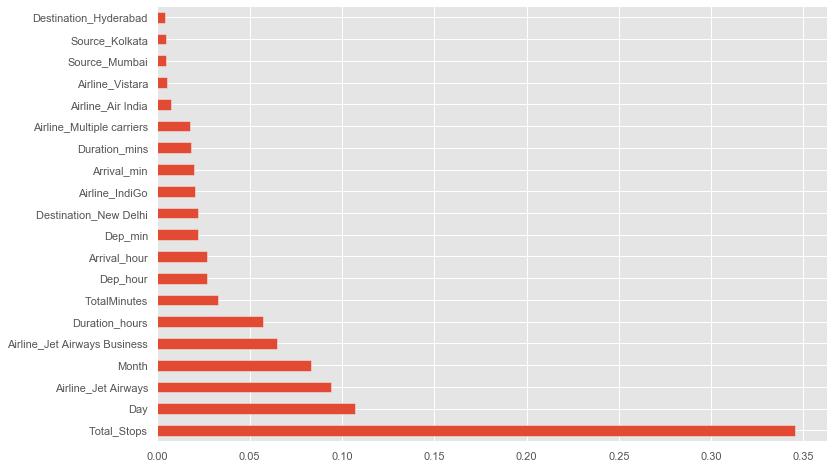

In [690]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Here we see Price is More Important then other variables 


In [691]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [692]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression



model = LinearRegression()

model.fit(X_train,y_train)

# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)

# predict the target on the test dataset
predict_train = model.predict(X_train)
print('\nItem_Outlet_Sales on training data',predict_train) 

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(X_test)
print('\nItem_Outlet_Sales on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)




Coefficient of model : [-5.10240061e+02  1.66901515e-08 -7.50324151e+01 -7.24098256e+01
  5.85150125e-01  9.02783434e+00  2.15284909e+00 -1.94759984e+01
  6.15453973e+00  6.61216769e+01  6.91748085e-02  2.62025984e+03
  1.76214585e+02  2.87002606e+02  4.38085901e+03  4.94345298e+04
  3.40428981e+03  4.31539159e+03 -1.40786506e+02 -1.32717695e+03
  1.92830256e+03  3.84738459e+03 -7.26932094e+01  2.23665297e+02
 -1.84316661e+02 -8.20344374e+02  2.23665297e+02 -1.13368085e+03
 -8.20344374e+02 -7.26932094e+01  1.98736980e+03]

Intercept of model 7522.181790639538

Item_Outlet_Sales on training data [ 9897.27730625 13150.04168104  6245.82750159 ... 11534.57063786
  7726.72271632 13569.01979664]

RMSE on train dataset :  2964.819550400365

Item_Outlet_Sales on test data [10307.80067478  8408.23994772  9430.22419057 ...  7656.6161054
 11236.13794735 11385.29032133]

RMSE on test dataset :  2962.651676121245


In [693]:
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

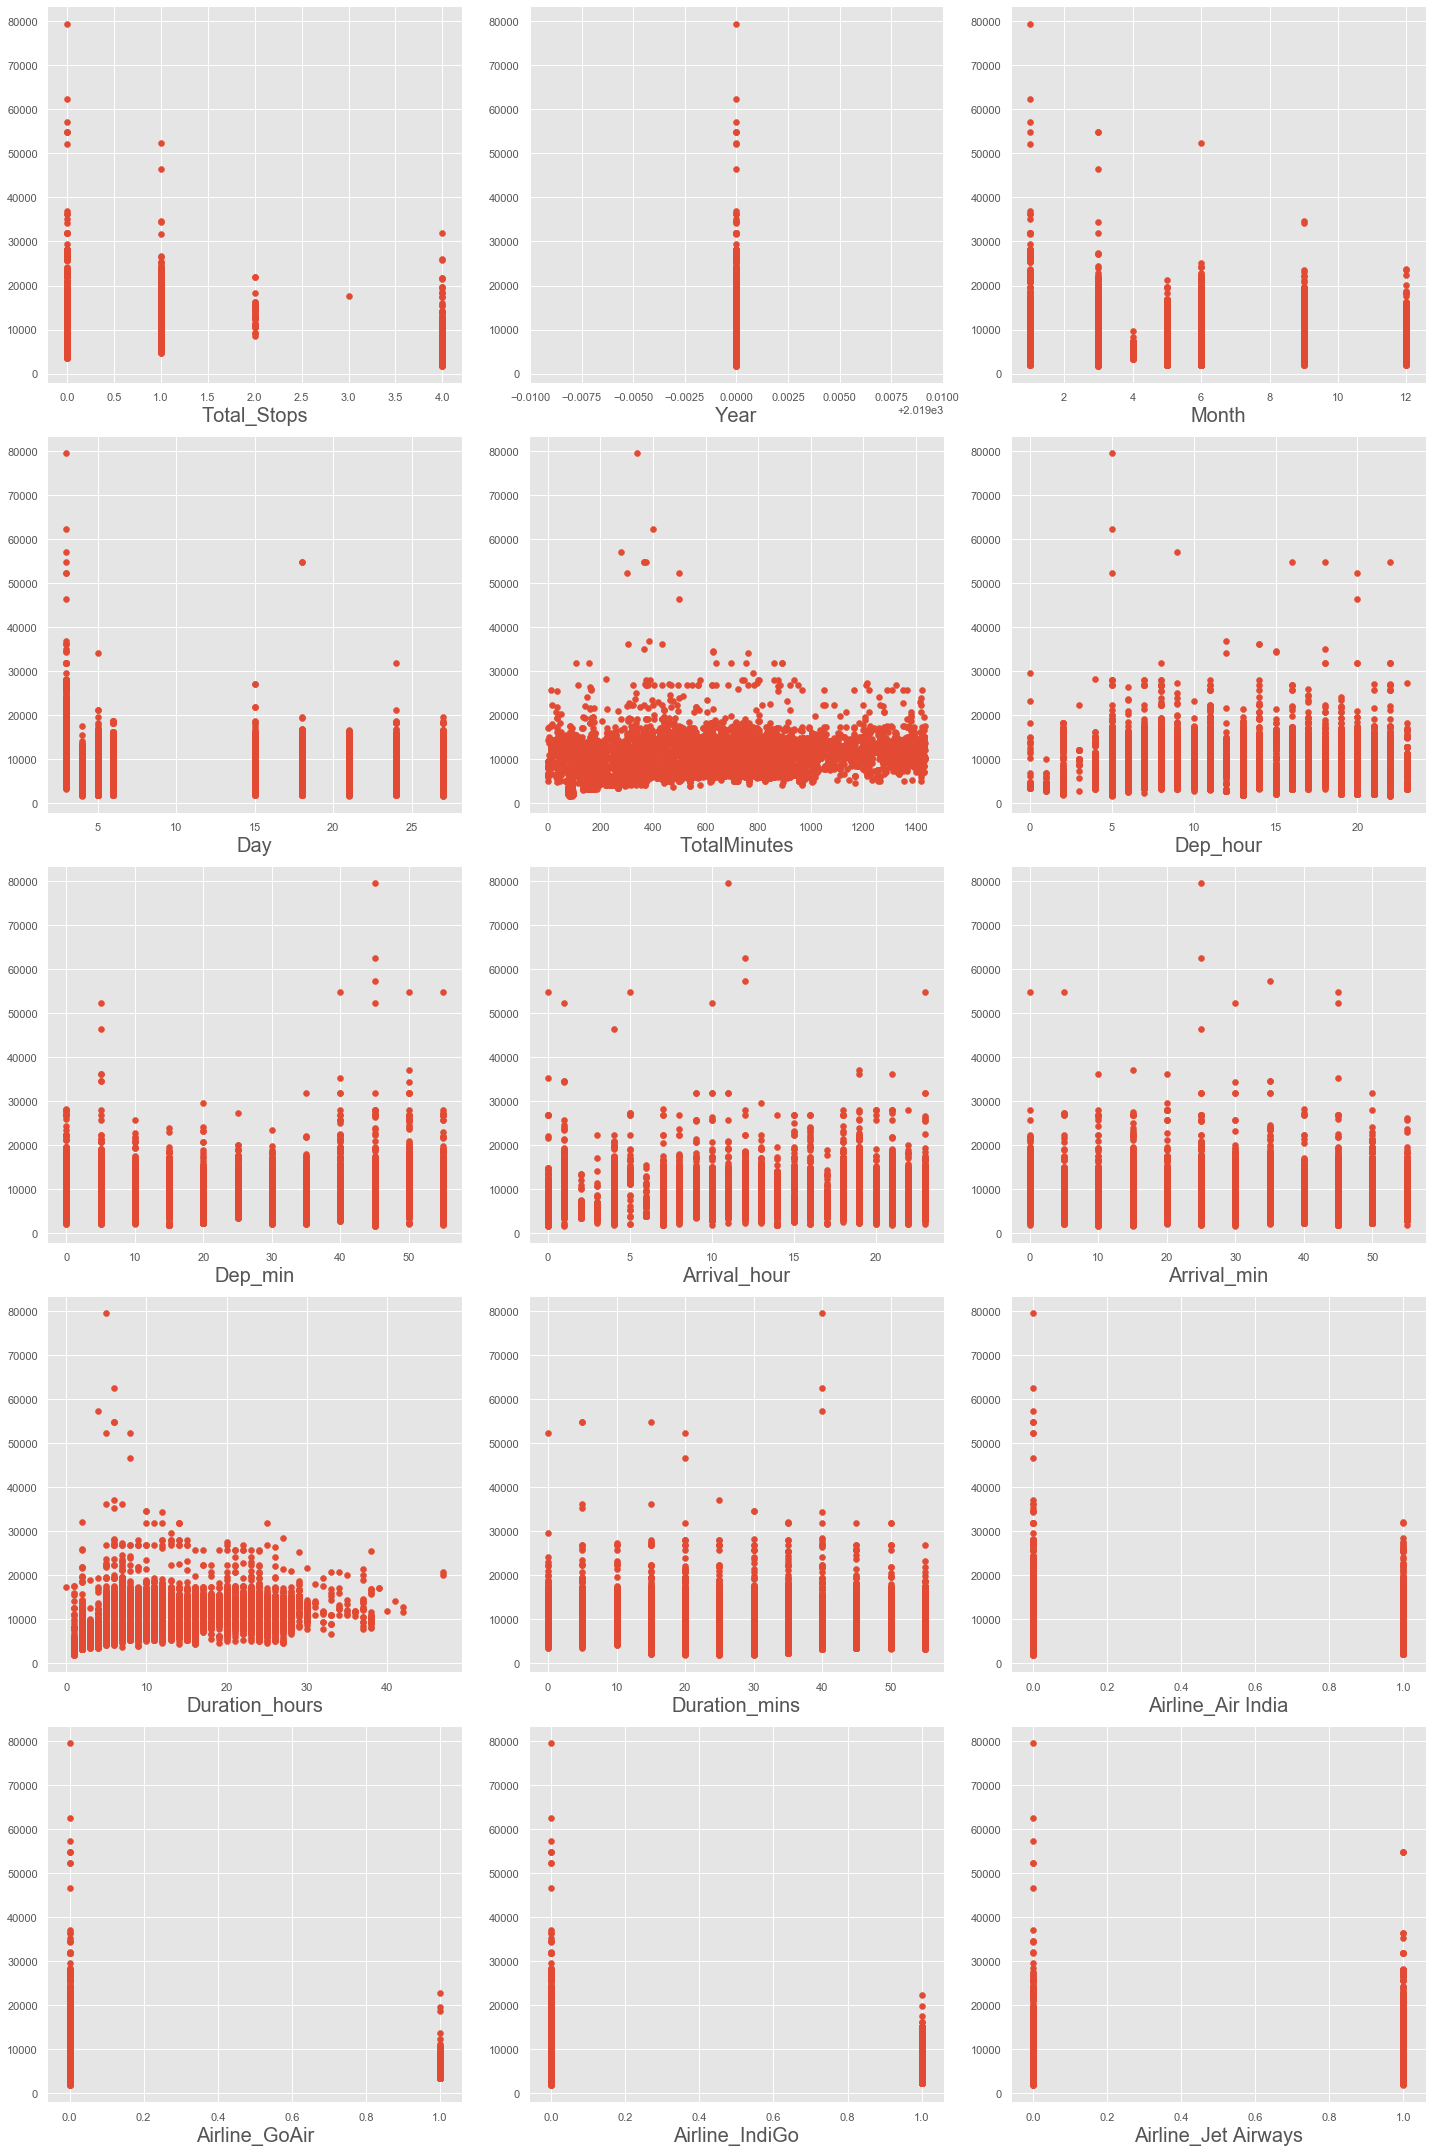

In [694]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [695]:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.5851656700097181

In [696]:

model.score(X_test, y_test)

0.5929282058229093

In [697]:
model.score(X_train, y_train)
adj_r2(X_train,y_train)


adj_r2(X_test,y_test)

0.5869333242934605

In [698]:
# Try lasso regression 
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

# Checking best alpha paramater 
alpha = lasscv.alpha_
alpha


#Now we have best parmater 
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.5929423994074906

In [699]:
# Now we can 

# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)


#ridge cv alpha
ridgecv.alpha_

0.21785852919601334

In [700]:
ridgecv.score(X_test, y_test)

0.5787182826002677

In [701]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [702]:
elasticCV.alpha_
elasticCV.l1_ratio

0.5

In [703]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=1576.0613924837457, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [704]:
elasticnet_reg.score(X_test, y_test)

0.22464457064706622

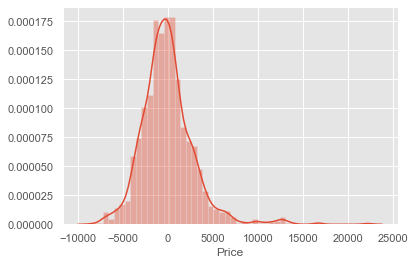

In [705]:
sns.distplot(y_test-y_pred)
plt.show()

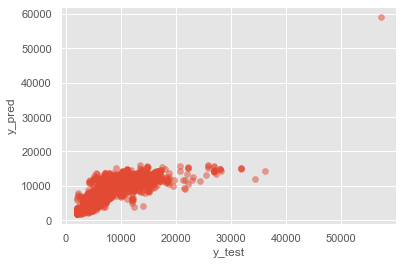

In [706]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [707]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2096.8271366146687
MSE: 8777304.954024022
RMSE: 2962.651676121245


In [708]:
# Stochastic 
import numpy as np
from sklearn import linear_model

SGDReg =linear_model.SGDRegressor()
SGDReg.fit(X_train, y_train)
print(SGDReg.score(X_train, y_train))
print(SGDReg.score(X_test, y_test))


# It not good 
# Because 
#Since only a single training example is considered before taking a step in the direction of gradient,
#we are forced to loop over the training set and thus cannot
#exploit the speed associated with vectorizing the code.

-6.41130376147008e+22
-6.291792570124876e+22


In [709]:
from sklearn.ensemble import GradientBoostingRegressor 
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7826652175377911
0.7912417630202478


In [714]:
import pickle
# open a file, where you ant to store the data
file = open('flightreg.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)


# What is Pickle File ?
# Pickle is a file ,which serialize our Model,(Means convert into some byte format) and this pickle we can deserialize it 
# accordingly 

In [716]:
model = open('flightreg.pkl','rb')
forest = pickle.load(model)

In [717]:

y_prediction = forest.predict(X_test)

In [718]:

metrics.r2_score(y_test, y_prediction)

0.7912417630202478

In [721]:
forest.predict(one)

array([15886.50807753])

In [720]:
one=X_test.head(1)

In [722]:
X_test.head(1)

,Total_Stops,Year,Month,Day,TotalMinutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,1.0,2019,5,21,625,15,5,1,30,10.0,...,0,0,1,0,0,1,0,0,0,0


In [728]:
X_test.columns

Index(['Total_Stops', 'Year', 'Month', 'Day', 'TotalMinutes', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [724]:
X_test.shape

(2137, 31)

In [725]:
list = [3,4]